# Quiz 2
Vivek Gopalakrishnan | September 11, 2019

## Question 1

For each patient $i=1,...,n$, the feature $X_i$ is encoded as follows:

$$
\begin{align}
X_i &= (x_{i1}, x_{i2}, ..., x_{ip}) \\
&= (\mathbb{1}(i \in G_1), \mathbb{1}(i \in G_2), ..., \mathbb{1}(i \in G_p)) \\
&\in \{e_1, e_2, ..., e_p\}
\end{align}
$$

where $\mathbb{1}(\cdot)$ is the indicator function. Note, this means the feature vector merely encodes the membership of each subject. 

For the linear model $\hat{Y}_i = \beta \cdot X_i$, we estimate $\beta$ by minimizing the sum of squared vertical deviations for all data $\sum_{i=1}^{n} (Y_i - \beta \cdot X_i) ^ 2$. Let us calculate the estimate for $\hat{\beta}_k$:

$$
\begin{align}
\frac{\partial}{\partial \beta_k} \sum_{i=1}^{n} (Y_i - \beta \cdot X_i)^2
&= \frac{\partial}{\partial \beta_k} \left( \sum_{k=1}^{p} \sum_{i \in G_k} (Y_i - \beta_k)^2 \right) \\
&= \frac{\partial}{\partial \beta_k} \sum_{i \in G_k} (Y_i - \beta_k)^2 \\
&= \sum_{i \in G_k} 2(Y_i - \beta_k)(0-1) \\
&= \sum_{i \in G_k} (\beta_k - Y_i) = 0 \,.
\end{align}
$$

Now we can solve for $\hat{\beta}_k$:

$$
\begin{align}
\sum_{i \in G_k} \beta_k &= \sum_{i \in G_k} Y_i \\
\hat{\beta}_k \bigm| G_k \bigm| &= \sum_{i \in G_k} Y_i \\
\hat{\beta}_k &= \frac{\sum_{i \in G_k} Y_i}{\bigm| G_k \bigm|} = \bar{Y}^{(k)} \,.
\end{align}
$$

(Note: $\bigm| G_k \bigm|$ represents the cardinality of $G_k$).

Then for any subject in group $G_k$, the predicted value of $Y$ is $\hat{\beta}_k = \bar{Y}^{(k)}$. 

## Question 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [2]:
# Fetch the data frame
df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")

# Extract the L and R hemisphere volumes
diencephalon_l = np.array(df.query("roi == 'Diencephalon_L'")["volume"])
diencephalon_r = np.array(df.query("roi == 'Diencephalon_R'")["volume"])

In [3]:
# Fit the linear model
slope, intercept, r_value, p_value, std_err = linregress(diencephalon_r, diencephalon_l)

# Create a function for the model
def predict_diencephalon_l_vol(diencephalon_r_vol):
    return slope * diencephalon_r_vol + intercept

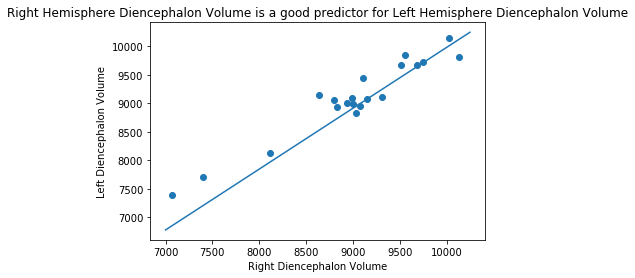

In [4]:
# Plot a scatter plot of the data
plt.scatter(diencephalon_l, diencephalon_r)

# Plot the fitted regression line
x = np.linspace(7000, 10250)
plt.plot(x, predict_diencephalon_l_vol(x))

# Add axis labels
plt.xlabel("Right Diencephalon Volume")
plt.ylabel("Left Diencephalon Volume")
plt.title("Right Hemisphere Diencephalon Volume is a good predictor for Left Hemisphere Diencephalon Volume")
plt.show()

In [5]:
# Report the regression coefficients
print("beta_0 = {}".format(intercept))
print("beta_1 = {}".format(slope))

beta_0 = -694.180922147847
beta_1 = 1.0675677731655153


In [6]:
# Report the in-sample error
predicted_diencephalon_l = predict_diencephalon_l_vol(diencephalon_r)
error = np.linalg.norm(predicted_diencephalon_l - diencephalon_l)**2
print("In-sample error rate is {}".format(error))

In-sample error rate is 832740.3005383222


## Question 3

I will train a classifer to predict an article of clothing's type from an image using the Fashion MNIST dataset. To do this, I will vectorize each image and use a Random Forest classifer.